In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('iris.csv')

Step 1: EDA - head(), describe (), groupby()

In [10]:
# Display first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Summary statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Groupby species
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Step 2: Feature scaling

In [8]:
# Encode species column
df['species'] = df['species'].astype('category').cat.codes

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 3: Training the K-NN model on the Training set 

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Step 4: Making the Confusion Matrix & Predicting Accuracy Score 

In [12]:
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", acc)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0


Step 5: Making Classification Report 

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Step 6: Comparing Error Rate with the K Value 

In [14]:
error = []
k_values = range(1, 31)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred_k = model.predict(X_test_scaled)
    error.append(np.mean(pred_k != y_test))

Step 7: Plot the error values against K values 

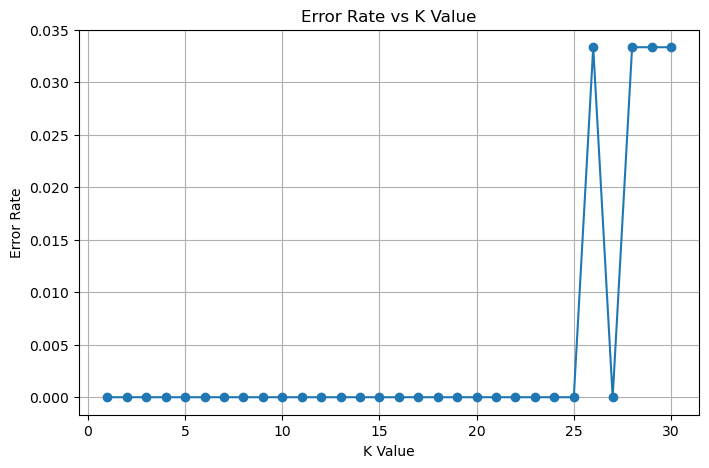

In [15]:
plt.figure(figsize=(8,5))
plt.plot(k_values, error, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K Value")
plt.grid()
plt.show()

Step 8: Finding best K 

In [16]:
best_k = k_values[np.argmin(error)]
best_k

1

Step 9: Visualize Test Result of KNN

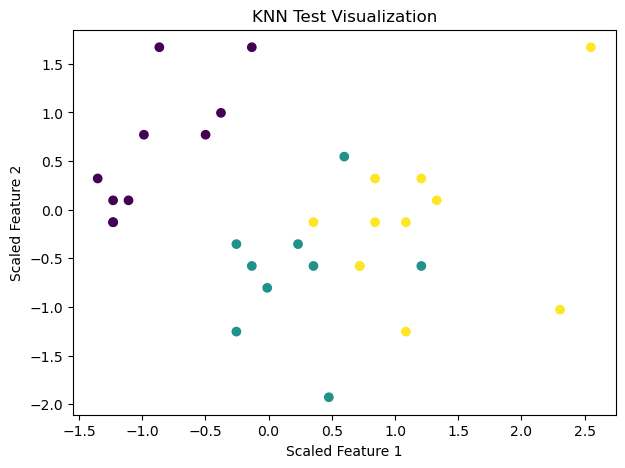

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred)
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.title("KNN Test Visualization")
plt.show()